In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [14]:
X,y = make_moons(100, noise = 0.25, random_state = 2)

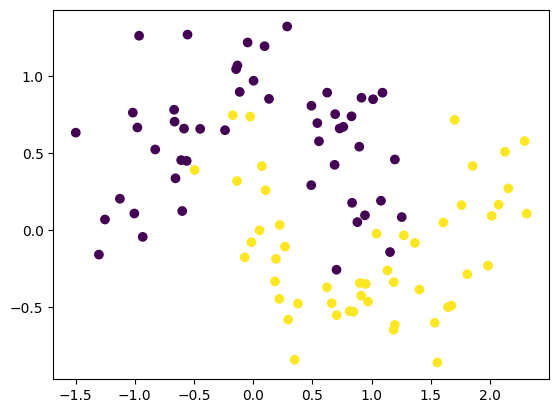

In [18]:
plt.scatter(X[:,0], X[:,-1], c=y)
plt.show()

In [20]:
model1 = Sequential()

model1.add(Dense(128, activation = 'relu', input_dim = 2))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [24]:
history = model1.fit(X,y, validation_split = 0.2, epochs = 2000, verbose= 0) # amra ekhane icche kore epochs beshi use korechi jeno overfitting hoy.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 180us/step


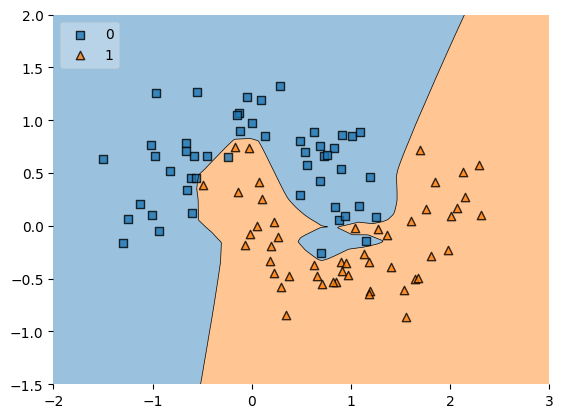

In [34]:
plot_decision_regions(X, y.astype('int'), clf = model1, legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

- ``` ekhane dekha jacche training data er upor model onek valo perform korte giye overfitting kore feleche.```

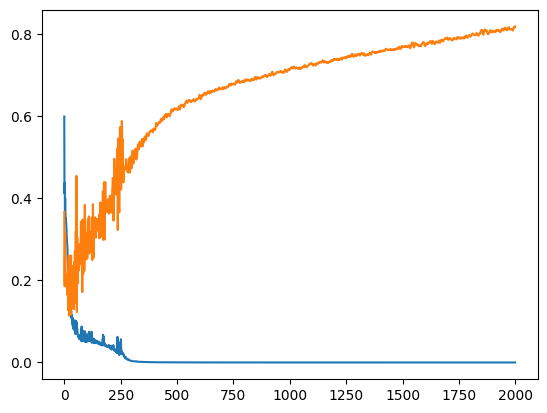

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

- ```huge gap duita graph er majhe, mane overfitting hocche```

In [52]:
# Now using Regularizer 

model2 = Sequential()

model2.add(Dense(128, activation = 'relu', input_dim = 2, kernel_regularizer = tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
adam = Adam(learning_rate = 0.01)
model2.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [56]:
history = model2.fit(X,y, epochs = 2000, validation_split = 0.2, verbose = 0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 184us/step


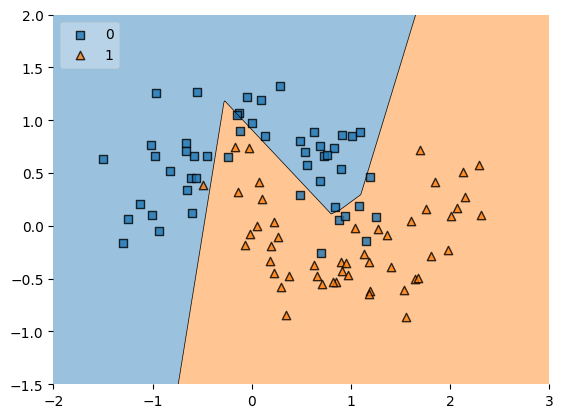

In [64]:
plot_decision_regions(X, y.astype('int'), clf = model2, legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)

plt.show()

- ```Ager tulonay onek tai overfitting reduce hoyeche. ```

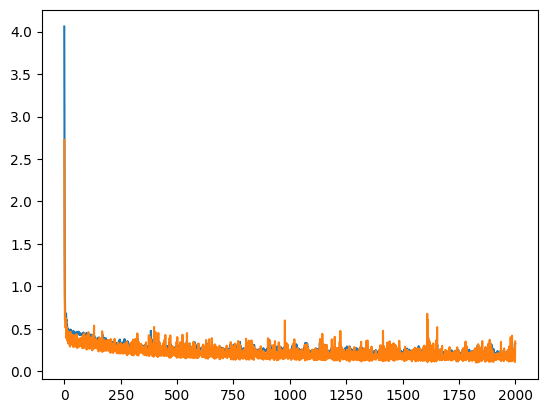

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

- ``` duita graph er moddhye gap reduce hoye almost similer hoye geche. ```

In [70]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

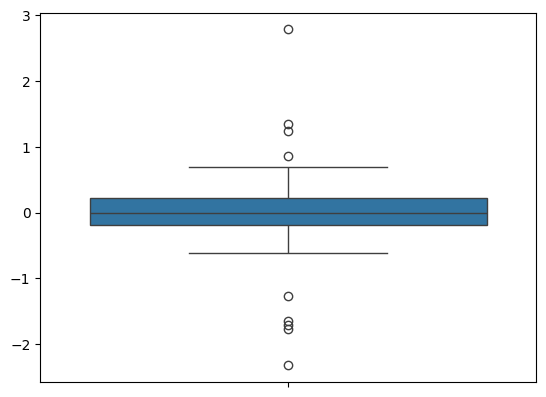

In [72]:
sns.boxplot(model1_weight_layer1)

<Axes: >

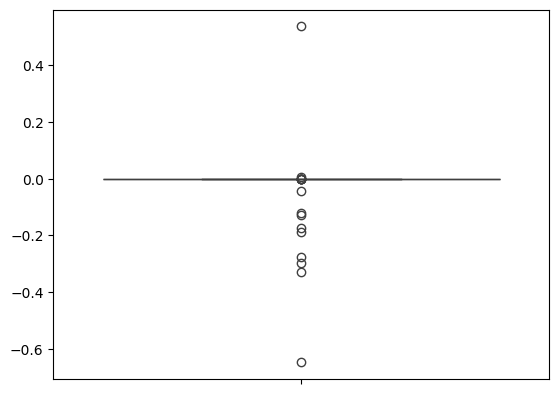

In [74]:
sns.boxplot(model2_weight_layer1)

In [76]:
model1_weight_layer1.min()

-2.3211174

In [78]:
model2_weight_layer1.min() # ager tulonay weight zero er dike move kor

-0.64716625

/var/folders/k_/w_0ddy056_b8jdbw_w07q8lh0000gn/T/ipykernel_18595/2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/var/folders/k_/w_0ddy056_b8jdbw_w07q8lh0000gn/T/ipykernel_18595/2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_laye

<Axes: ylabel='Density'>

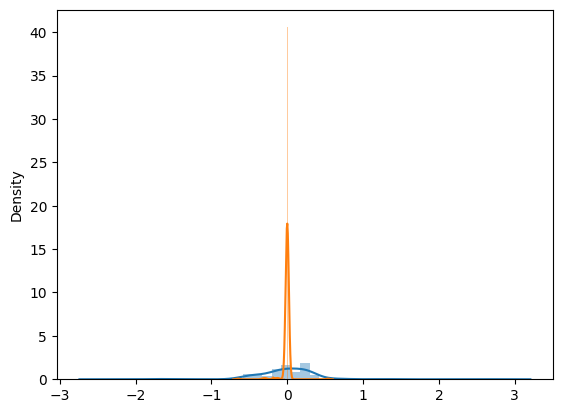

In [80]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [82]:
model1.get_weights()[0].reshape(256)

array([ 2.48996541e-01,  2.86637425e-01,  2.50838667e-01,  2.78189033e-01,
        2.11883590e-01,  2.30210692e-01,  2.60530502e-01,  2.63827175e-01,
        1.18501596e-01,  3.26605022e-01, -5.08260429e-01, -5.96283317e-01,
        1.17339000e-01,  2.48042390e-01, -4.92076874e-01, -2.31454205e-02,
        2.40262225e-01, -4.60499108e-01, -2.11899087e-01,  2.75988489e-01,
       -2.30587497e-01,  9.88242850e-02,  2.78381616e-01, -4.81697142e-01,
       -9.07739531e-03, -3.31423283e-01,  1.26370564e-02,  2.16530383e-01,
       -5.06956697e-01,  2.97530472e-01,  2.59091854e-01, -1.00355707e-01,
       -1.27769589e-01, -4.92079049e-01,  2.56731987e-01,  1.49086818e-01,
       -8.68231803e-02,  3.37407470e-01,  2.96062291e-01, -2.48912781e-01,
        2.11968541e-01, -4.32822645e-01, -1.84141099e-01, -4.77413088e-01,
       -4.15763289e-01,  1.46679983e-01,  2.98779190e-01,  9.14140418e-02,
       -5.16603291e-01, -3.78767163e-01,  1.82077929e-01,  3.35912615e-01,
        3.21093768e-01,  